In [3]:
import numpy as np
import matplotlib.pyplot as plt
arr = np.loadtxt('https://lectures.scientific-python.org/_downloads/087d8fe936fcb7a4762b9850b932cf9e/populations.txt')

Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

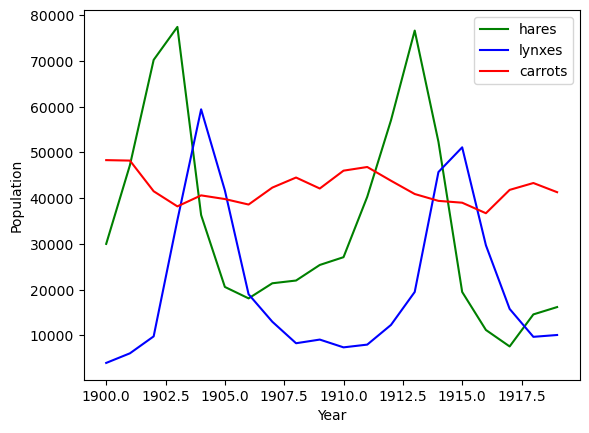

In [21]:
yr = np.array([arr[i, 0] for i in range(20)])
har = np.array([arr[i, 1] for i in range(20)])
lyn = np.array([arr[i, 2] for i in range(20)])
car = np.array([arr[i, 3] for i in range(20)])

plt.plot(yr, har, label = 'hares', c = 'g')
plt.plot(yr, lyn, label = 'lynxes', c = 'b')
plt.plot(yr, car, label = 'carrots', c = 'r')

plt.xlabel('Year')
plt.ylabel('Population')

plt.legend()
plt.show()

Find which year each species had the largest population. Mark these years in the plot of populations.

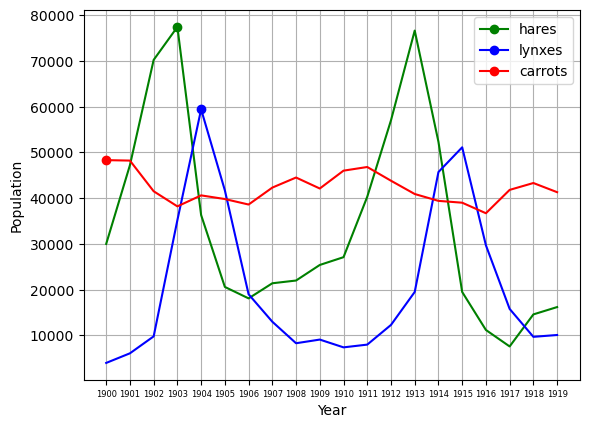

In [6]:
plt.plot(yr, har, label = 'hares', c = 'g', markevery = [np.argmax(har)], marker = 'o')
plt.plot(yr, lyn, label = 'lynxes', c = 'b', markevery = [np.argmax(lyn)], marker = 'o')
plt.plot(yr, car, label = 'carrots', c = 'r', markevery = [np.argmax(car)], marker = 'o')

plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(yr, fontsize = 6)

plt.legend()
plt.grid()
plt.show()

Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

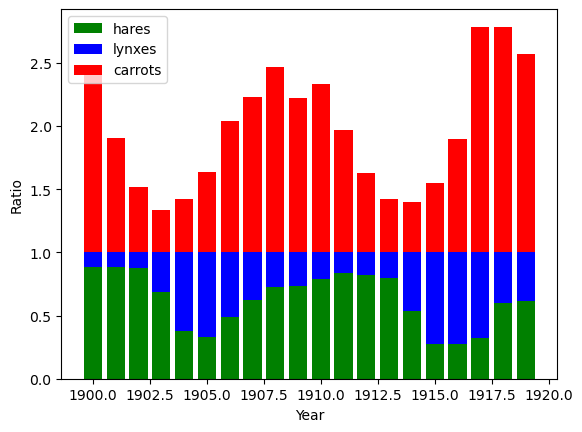

In [79]:
hr = har / (har + lyn)
lr = lyn / (har + lyn)
cr = car / (har + lyn)

plt.bar(yr, hr, label = 'hares', color = 'g')
plt.bar(yr, lr, bottom = hr, label = 'lynxes', color = 'b')
plt.bar(yr, cr, bottom = lr + hr, label = 'carrots', color = 'r')

plt.xlabel('Year')
plt.ylabel('Ratio')
plt.legend()
plt.show()

Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

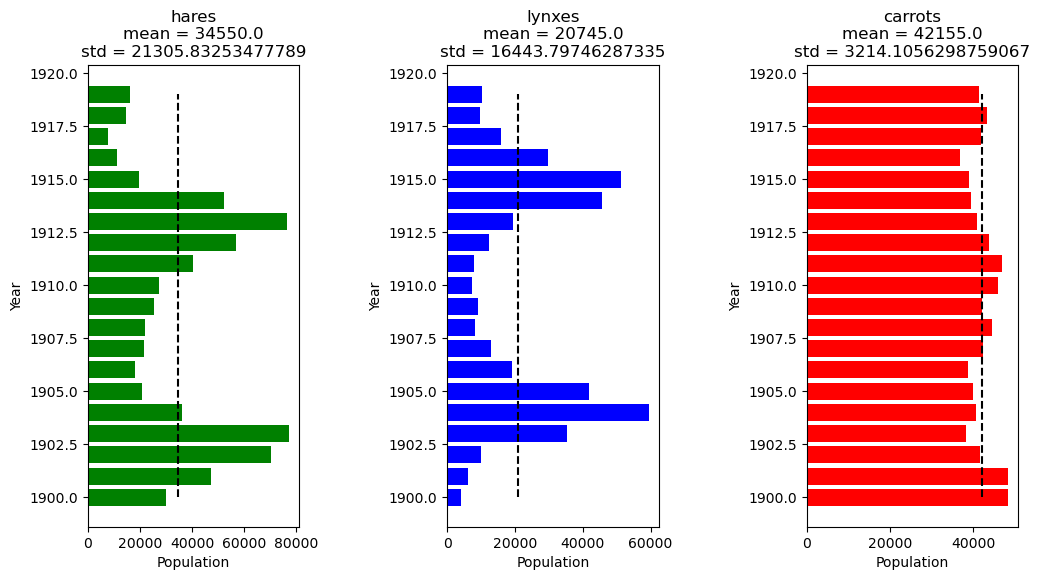

In [35]:
plt.figure(figsize = (12, 6))
plt.subplots_adjust(wspace = 0.7)

plt.subplot(1, 3, 1)
plt.title('hares\nmean = ' + str(np.mean(har)) + '\nstd = ' + str(np.std(har)))
plt.barh(yr, har, color = 'g', label = 'hares')
plt.plot([np.mean(har) for y in yr], yr, '--', c = 'k')
plt.ylabel('Year')
plt.xlabel('Population')

plt.subplot(1, 3, 2)
plt.title('lynxes\nmean = ' + str(np.mean(lyn)) + '\nstd = ' + str(np.std(lyn)))
plt.barh(yr, lyn, color = 'b', label = 'lynxes')
plt.plot([np.mean(lyn) for y in yr], yr, '--', c = 'k')
plt.ylabel('Year')
plt.xlabel('Population')

plt.subplot(1, 3, 3)
plt.title('carrots\nmean = ' + str(np.mean(car)) + '\nstd = ' + str(np.std(car)))
plt.barh(yr, car, color = 'r', label = 'carrots')
plt.plot([np.mean(car) for y in yr], yr, '--', c = 'k')
plt.ylabel('Year')
plt.xlabel('Population')

plt.show()

Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H']


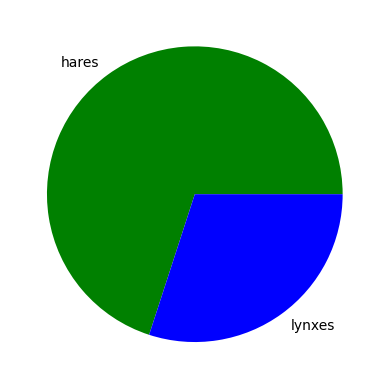

In [16]:
hl = [('H' if har[i] > lyn[i] else 'L') for i in range(np.size(yr))]
print(hl)

plt.pie([hl.count('H'), hl.count('L')], labels = ['hares', 'lynxes'], colors = ['g', 'b'])
plt.show()

Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

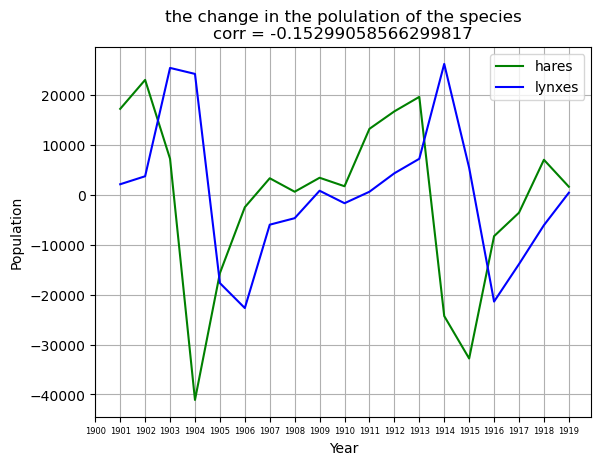

In [44]:
dhar = np.array([har[i + 1] - har[i] for i in range(np.size(har) - 1)])
dlyn = np.array([lyn[i + 1] - lyn[i] for i in range(np.size(lyn) - 1)])

corr = np.dot(dhar, dlyn.T) / (np.size(dhar) * np.std(lyn) * np.std(lyn))

plt.title('the change in the polulation of the species\ncorr = ' + str(corr))
plt.plot([yr[i + 1] for i in range(np.size(yr) - 1)], dhar, c = 'g', label = 'hares')
plt.plot([yr[i + 1] for i in range(np.size(yr) - 1)], dlyn, c = 'b', label = 'lynxes')

plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(yr, fontsize = 6)
plt.grid()
plt.legend()
plt.show()

Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

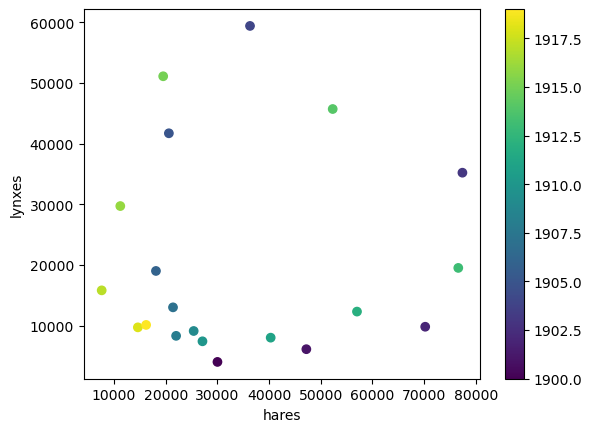

In [62]:
plt.scatter(har, lyn, c = yr)
plt.xlabel('hares')
plt.ylabel('lynxes')
plt.colorbar()
plt.show()

Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [63]:
# As one can see from the graphs, both absolute values and changes of the population of hares and lynxes
# look like periodic functions of time with the period of about 10 years.
# Therefore these functions can be expected to behave in 1919-20 almost in the same way, as in 1909-10.
# So an estimate for the population of hares in 1920 can be one in 1919 plus the change of hares' population in 1909-10
# whith the coefficient of the ratio of the changes of lynxes' population in 1919-20 and in 1909-1910,
# the coefficient being used to take the change of natural conditions into account.

est = har[18] + dhar[8] * dlyn[18] / dlyn[8]
val = har[19]
r = abs((val - est) / val)
print('the population of hares in 1920:\nestimate = ' + str(est) + '\ntrue value = ' + str(val) + '\nerr_ratio = ' + str(r))

the population of hares in 1920:
estimate = 16300.0
true value = 16200.0
err_ratio = 0.006172839506172839
